# Preamble

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
energy = pd.read_csv('temp_energy.csv')
energy

,average temperature/°C,Energy consumption/kWh
0,-10,46.5
1,-5,37.9
2,0,33.2
3,5,27.5
4,10,20.3
5,15,21.1
6,20,14.2
7,25,6.3
8,30,5.6


<Axes: xlabel='average temperature/°C', ylabel='Energy consumption/kWh'>

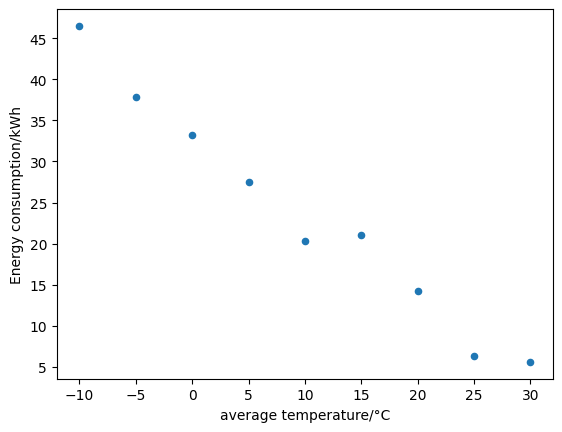

In [211]:
energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')

23.622222222222224

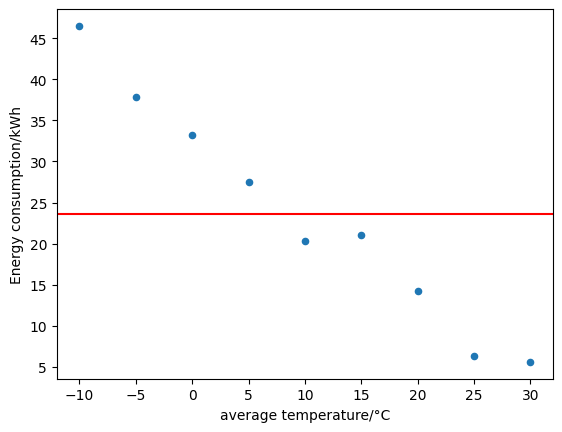

In [5]:
ax = energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')
avg = np.average(energy['Energy consumption/kWh'])
ax.axhline(y = avg, color = 'r')
avg

In [213]:
X = energy.drop(['Energy consumption/kWh'], axis=1)
y = energy['Energy consumption/kWh']

In [214]:
ols = LinearRegression()

ols.fit(X, y)

intercept, coef = ols.intercept_, ols.coef_[0]
intercept, coef

(33.715555555555554, -1.0093333333333334)

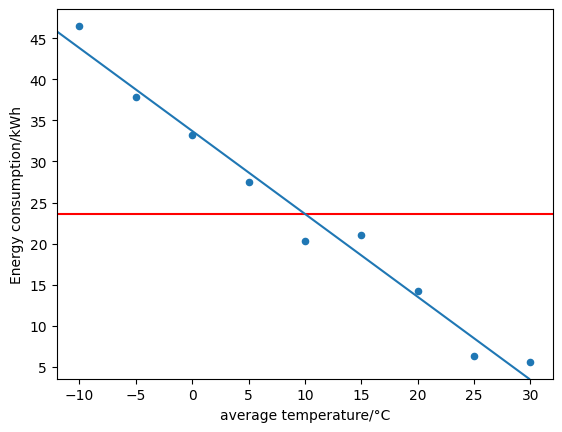

In [215]:
ax = energy.plot(x='average temperature/°C', y='Energy consumption/kWh', kind='scatter')
ax.axhline(y = avg, color = 'r')
ax.axline(xy1 = (0, intercept), slope = coef)

In [216]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 1)
X1 = poly.fit_transform(X)

ols.fit(X1, y)

intercept, coef = ols.intercept_, ols.coef_
intercept, coef

(0.0, array([33.71555556, -1.00933333]))

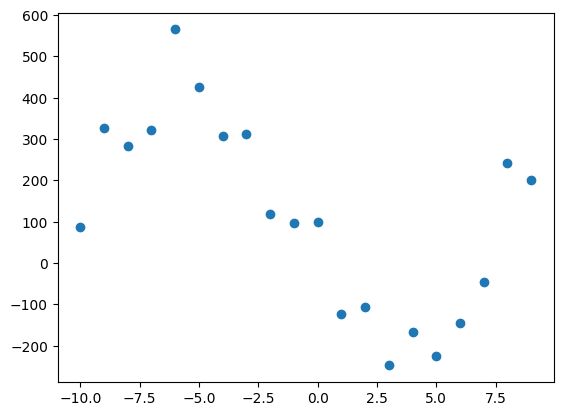

In [217]:
X = (np.arange(-20, 20, 2) * .5)
np.random.seed(504)
y = X**3 + 4 * X**2 - 75 * X - 22 + np.random.standard_normal(X.size) * 75
plt.scatter(X, y)


In [218]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 2)
X2 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X2, y)

intercept, coef = ols.intercept_, ols.coef_
intercept, coef


(0.0, array([ 51.61335539, -21.70653772,   1.60128768]))

0.38962038413611966

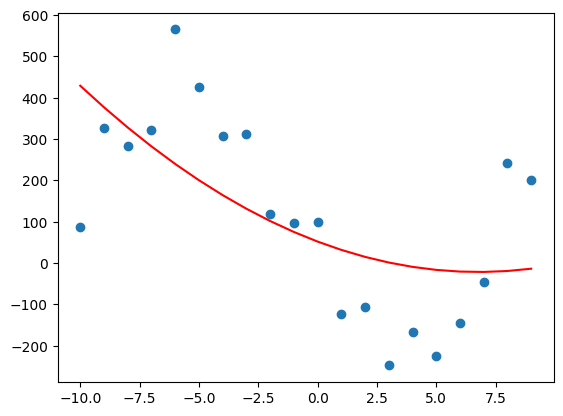

In [219]:

y_predict = coef[2] * X**2 + coef[1] * X + coef[0]
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X2, y)

In [220]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 3)
X3 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X3, y)

intercept, coef = ols.intercept_, ols.coef_
intercept, coef

(0.0, array([ 18.82830773, -86.7246962 ,   3.25709817,   1.10387366]))

0.9052901140128919

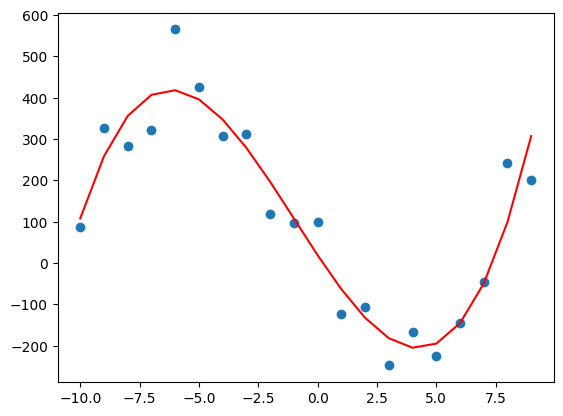

In [221]:
y_predict = coef[3] * X ** 3 + coef[2] * X**2 + coef[1] * X**1 + coef[0] * X**0
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X3, y)

0.9803096497645014

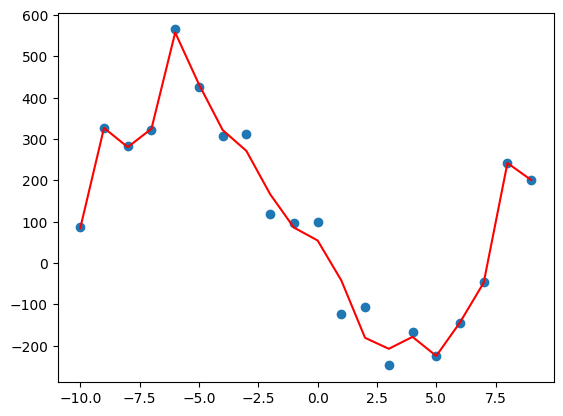

In [222]:
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree = 15)
X2 = poly.fit_transform(X.reshape(-1, 1))

ols.fit(X2, y)

coef = ols.coef_

y_predict = np.zeros(y.size)
for i in range(coef.size):
    y_predict += coef[i] * X ** i

plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
ols.score(X2, y)